# Laboratory excercise 1 and 2
The notebook contains excercise connected to the auditory excerices 1 and 2. For any questions feel free to contact assistans: eda.jovicic@fer.hr and filip.tomas@fer.hr

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

1. Load the dataset *student_score.csv*. When loading the dataset watch out for the index column. 

In [2]:
x = pd.read_csv("students_score_1.csv", index_col = 0)
#dataset has now been loaded

2. Print the size of the dataset. List the number of examples and the number of features. 

In [3]:
x.shape

(30641, 15)

There are 30641 examples with 15 features

3. Show the first 5 examples of the dataset. 

In [4]:
x.head()
#this shows the first 5 examples in the dataset

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,520645,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,303683,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


4. Using the third example from the dataset print for every feature the type of data (int, float, string or bool).

In [5]:
a = x.iloc[2]
for column_name, value in a.items():
    data_type = type(value)
    print(column_name,":    ", data_type)
#all feature types are now printed using the third example

StudentId :     <class 'numpy.int64'>
Gender :     <class 'str'>
EthnicGroup :     <class 'str'>
ParentEduc :     <class 'str'>
LunchType :     <class 'str'>
TestPrep :     <class 'str'>
ParentMaritalStatus :     <class 'str'>
PracticeSport :     <class 'str'>
IsFirstChild :     <class 'str'>
NrSiblings :     <class 'numpy.float64'>
TransportMeans :     <class 'str'>
WklyStudyHours :     <class 'str'>
MathScore :     <class 'numpy.int64'>
ReadingScore :     <class 'numpy.int64'>
WritingScore :     <class 'numpy.int64'>


5. For numerical features print the value of mean, standard deviation and median. 


In [6]:
x_tmp = x.loc[:,['StudentId', 'NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']]
print(f'Mean: \n{x_tmp.mean()}\n')
print(f'Standard deviation: \n{x_tmp.std()}\n')
print(f'Median: \n{x_tmp.median()}')
#mean, sd and median are printed for all features

Mean: 
StudentId       549614.852257
NrSiblings           2.147305
MathScore           66.558402
ReadingScore        69.377533
WritingScore        68.418622
dtype: float64

Standard deviation: 
StudentId       257913.251180
NrSiblings           1.466746
MathScore           15.361616
ReadingScore        14.758952
WritingScore        15.443525
dtype: float64

Median: 
StudentId       550904.0
NrSiblings           2.0
MathScore           67.0
ReadingScore        70.0
WritingScore        69.0
dtype: float64


6. Check if there are any monotonous attributes. If you find a monotonous attribute, remove it from the dataset.

In [7]:
x.nunique()
#StudentID is a monotonous attribute

StudentId              30641
Gender                     2
EthnicGroup                5
ParentEduc                 6
LunchType                  2
TestPrep                   2
ParentMaritalStatus        4
PracticeSport              3
IsFirstChild              12
NrSiblings                11
TransportMeans             2
WklyStudyHours             3
MathScore                 95
ReadingScore              90
WritingScore              93
dtype: int64

In [8]:
x.drop(('StudentId'), axis=1, inplace=True)
#StudentID has been dropped

7. Check the data for missing values. Print the number of missing values for each feature.

In [9]:
x.isna().sum()
#There are many missing values

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

8. Let's deal with the missing values. 

a) For the features EthnicGroup, ParentMaritalStatus and WklyStudyHours replace NaN values with the most common value.

b) For the feature ParentEduc replace NaN value with a string *no formal education*.

c) For the feature TestPrep replace NaN value with a string *none*.

d) For the features PracticeSport and IsFirstChild remove all the examples with NaN values. 

e) For the feature NrSiblings replace the NaN value with the median value.

f) Finally, for the feature TransportMeans replace the NaN value with a string *walking*.




In [10]:
x.loc[x.EthnicGroup.isna(),'EthnicGroup'] = x.loc[:,'EthnicGroup'].mode() 
x.loc[x.ParentMaritalStatus.isna(),'ParentMaritalStatus'] = x.loc[:,'ParentMaritalStatus'].mode() 
x.loc[x.WklyStudyHours.isna(),'WklyStudyHours'] = x.loc[:,'WklyStudyHours'].mode() 
x['ParentEduc'].fillna('no formal education', inplace=True)
x['TestPrep'].fillna('none', inplace=True)
x.dropna(subset=['PracticeSport', 'IsFirstChild'], inplace=True)
x.loc[x.NrSiblings.isna(),'NrSiblings'] = x.loc[:,'NrSiblings'].median()
x['TransportMeans'].fillna('walking', inplace=True)
#The missing values have now been replaced with appropriate values

9. Are there inconsistencies in the IsFirstChild column? Replace the inconsistent entries so they match the rest of the values. 

In [11]:
unique = x['IsFirstChild'].unique()
print(unique)
#There are many inconsistencies 

['yes' 'no' 'nein' 'nope' 'ye' 'si' 'Yes' 'yeah' 'noo' 'ys' 'yeah boy'
 'es']


In [12]:
x['IsFirstChild'] = x['IsFirstChild'].replace(['ye', 'si','Yes', 'yeah', 'ys', 'yeah boy', 'es'], 'yes')
x['IsFirstChild'] = x['IsFirstChild'].replace(['nein', 'nope', 'noo'], 'no')
#Inconsistencies are being replaced

In [13]:
unique = x['IsFirstChild'].unique()
print(unique)
#Inconsistencies have been replaced

['yes' 'no']


10. The final step to preparing the dataset for classification is transforming the non-numeric variables to numeric variables. 
For features Gender and LunchType use OneHot Encoder, and for EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, TransportMeans and WklyStudyHours use Label Encoder. 

In [14]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(x[['Gender']])
X_tmp = encoder.transform(x[['Gender']])
X_tmp = pd.DataFrame(X_tmp.toarray(), columns=encoder.get_feature_names_out(['Gender']))
x = x.reset_index(drop=True)
x = pd.concat((x, X_tmp), axis=1)
x.head()
x.drop(('Gender'), axis=1, inplace=True)
#Gender has been transformed into a numeric variable

In [15]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(x[['LunchType']])
X_tmp = encoder.transform(x[['LunchType']])
X_tmp = pd.DataFrame(X_tmp.toarray(), columns=encoder.get_feature_names_out(['LunchType']))
x = pd.concat((x, X_tmp), axis=1)
x.drop(('LunchType'), axis=1, inplace=True)
#LunchType has been transformed into a numeric variable

In [16]:
le = LabelEncoder()
le.fit(x.loc[:,'EthnicGroup'])
x.loc[:,'EthnicGroup'] = le.transform(x.loc[:,'EthnicGroup'])

le.fit(x.loc[:,'ParentEduc'])
x.loc[:,'ParentEduc'] = le.transform(x.loc[:,'ParentEduc'])

le.fit(x.loc[:,'TestPrep'])
x.loc[:,'TestPrep'] = le.transform(x.loc[:,'TestPrep'])

le.fit(x.loc[:,'ParentMaritalStatus'])
x.loc[:,'ParentMaritalStatus'] = le.transform(x.loc[:,'ParentMaritalStatus'])

le.fit(x.loc[:,'PracticeSport'])
x.loc[:,'PracticeSport'] = le.transform(x.loc[:,'PracticeSport'])

le.fit(x.loc[:,'IsFirstChild'])
x.loc[:,'IsFirstChild'] = le.transform(x.loc[:,'IsFirstChild'])

le.fit(x.loc[:,'TransportMeans'])
x.loc[:,'TransportMeans'] = le.transform(x.loc[:,'TransportMeans'])

le.fit(x.loc[:,'WklyStudyHours'])
x.loc[:,'WklyStudyHours'] = le.transform(x.loc[:,'WklyStudyHours'])

x.head(15)
#More variables have been tranformed but this time using LabelEncoder, the first 15 examples in the dataset are printed to check
#if the tranformation worked as intended

C:\Users\jojom\AppData\Local\Temp\ipykernel_7700\2150544299.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,'EthnicGroup'] = le.transform(x.loc[:,'EthnicGroup'])
C:\Users\jojom\AppData\Local\Temp\ipykernel_7700\2150544299.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,'ParentEduc'] = le.transform(x.loc[:,'ParentEduc'])
C:\Users\jojom\AppData\Local\Temp\ipykernel_7700\2150544299.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a 

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
5,1,0,1,1,1,1,1.0,1,0,73,84,79,1.0,0.0,0.0,1.0
6,1,5,0,3,0,0,1.0,0,0,85,93,89,1.0,0.0,0.0,1.0
7,1,5,1,1,2,1,1.0,0,2,41,43,39,0.0,1.0,1.0,0.0
8,3,2,0,2,2,0,3.0,0,2,65,64,68,0.0,1.0,1.0,0.0
9,1,2,1,1,1,1,2.0,0,1,37,59,50,1.0,0.0,1.0,0.0


In [17]:
x.to_csv('students_cleaned.csv', index=False)
#the cleaned dataset is saved

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [2]:
x = pd.read_csv("students_cleaned.csv")
x.head()
#cleaned dataset is loaded and checked

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

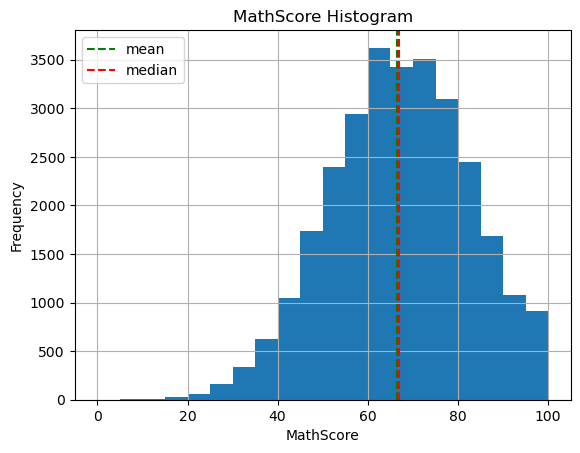

In [3]:
plt.hist(x.MathScore, bins=20)
plt.axvline(x.MathScore.mean(), color = 'green', label = "mean", linestyle = "dashed")
plt.axvline(x.MathScore.median(), color = 'red', label = "median", linestyle = "dashed")
plt.xlabel('MathScore')
plt.ylabel('Frequency')
plt.title('MathScore Histogram')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()
#histogram is drawn with all the necessary components

3. a) Make a pie chart of the feature NrSiblings. <br>
   b) Display the labels for each wedge. <br>
   c) Display the percentages within edge wedge. <br>
   d) Title the figure "NrSiblings pie chart".

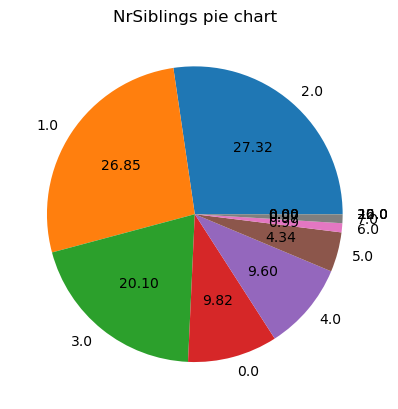

In [4]:
nr_siblings_column = x['NrSiblings']
nr_siblings_counts = nr_siblings_column.value_counts()
labels = nr_siblings_counts.index.tolist()
plt.pie(nr_siblings_counts, labels=labels, autopct='%.2f')
plt.title('NrSiblings pie chart')
plt.show()
#Pie chart is drawn with the necessary components

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group. <br>
   b) Color each bar in a different color. Set the transparency of the bars to 0.7 <br>
   c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

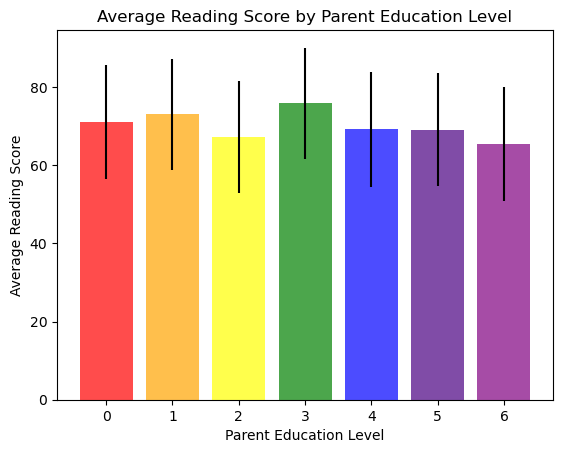

In [5]:
avg_reading_score = x.groupby('ParentEduc')['ReadingScore'].mean()
std_dev_reading_score = x.groupby('ParentEduc')['ReadingScore'].std()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple']
plt.bar(avg_reading_score.index, avg_reading_score, yerr=std_dev_reading_score, color=colors, alpha=0.7)
plt.xlabel('Parent Education Level')
plt.ylabel('Average Reading Score')
plt.title('Average Reading Score by Parent Education Level')
plt.show()
#Bar chart is drawn with the necessary components

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore. 
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

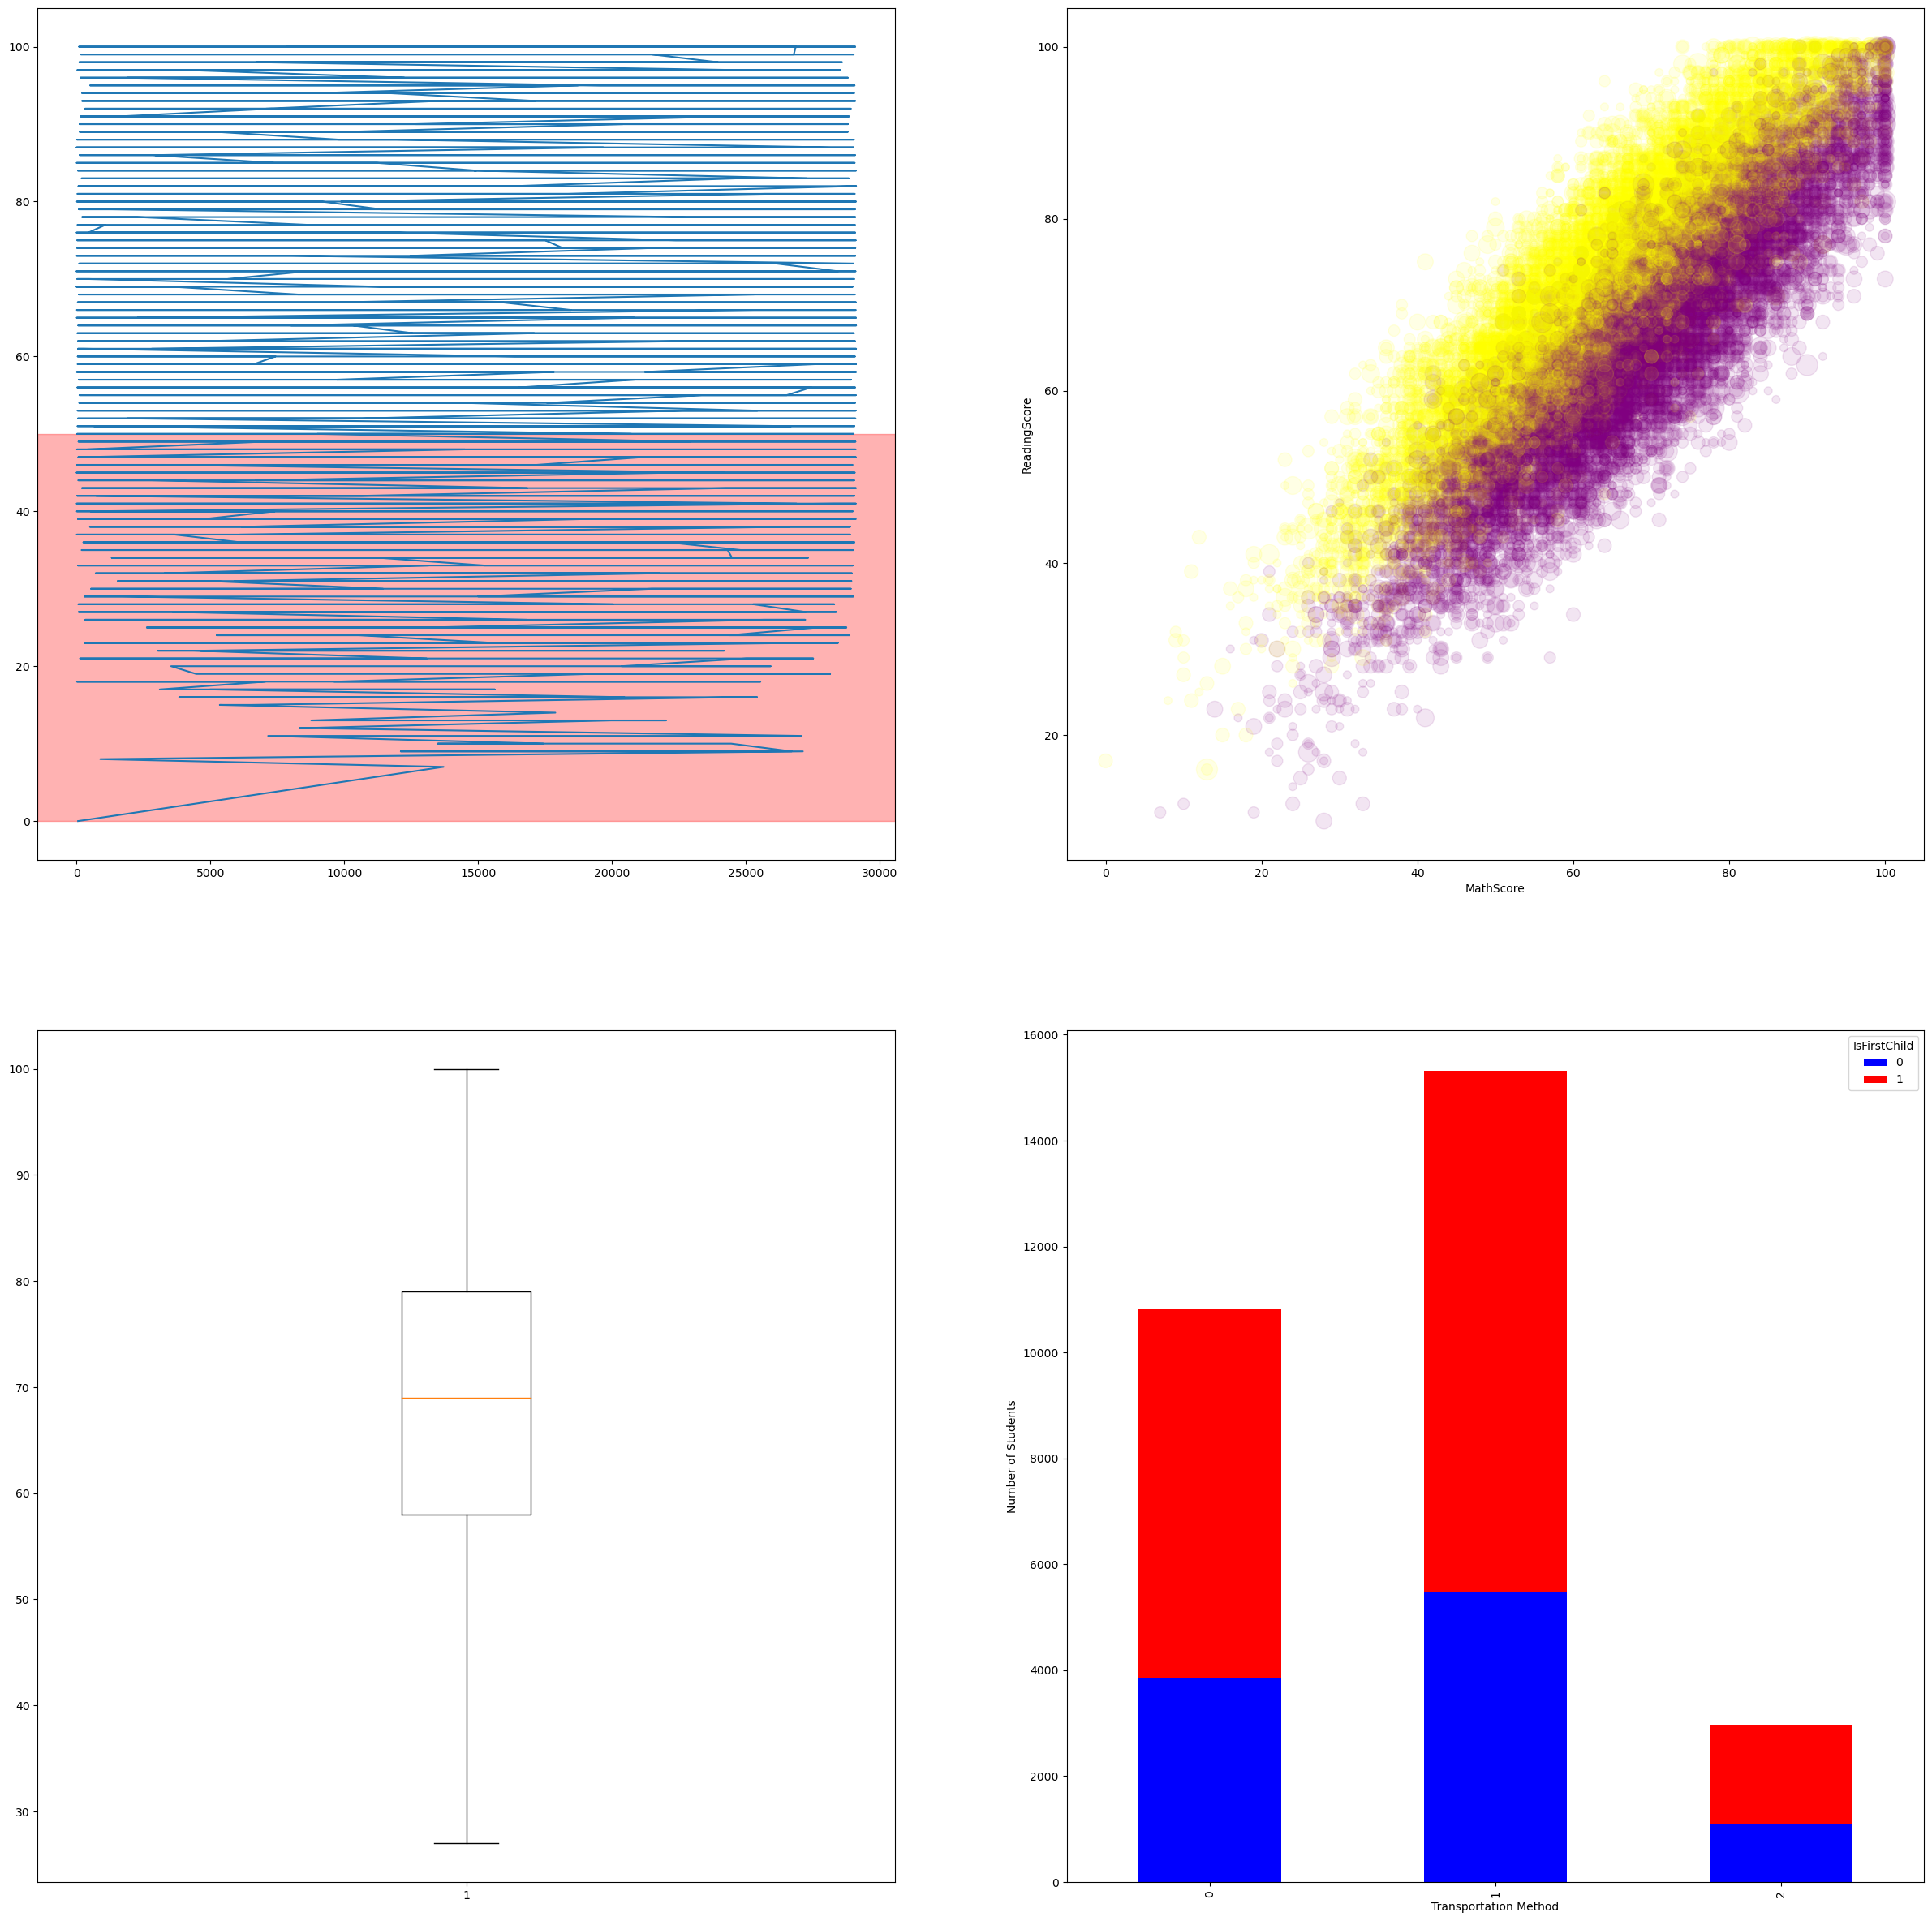

In [6]:
sorted_x = x.sort_values(by='MathScore', ascending=False)
fig, axs = plt.subplots(2, 2, figsize=(30, 30))

axs[0, 0].plot(sorted_x['MathScore'])
axs[0, 0].axhspan(0, 50, color='red', alpha=0.3)
axs[0, 0].set_title('')

colors = x['Gender_female'].map({0: 'purple', 1: 'yellow'})
size = 50 * x['NrSiblings']
scatter = axs[0, 1].scatter(x['MathScore'], x['ReadingScore'], c=colors, s=size, alpha=0.1)
axs[0, 1].set_xlabel('MathScore')
axs[0, 1].set_ylabel('ReadingScore')

axs[1, 0].boxplot(x['WritingScore'], showfliers=False)

stacked_data = x.groupby(['TransportMeans', 'IsFirstChild']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axs[1, 1])
axs[1, 1].set_xlabel('Transportation Method')
axs[1, 1].set_ylabel('Number of Students')

plt.show()
#The figure is drawn with the necessary components

6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

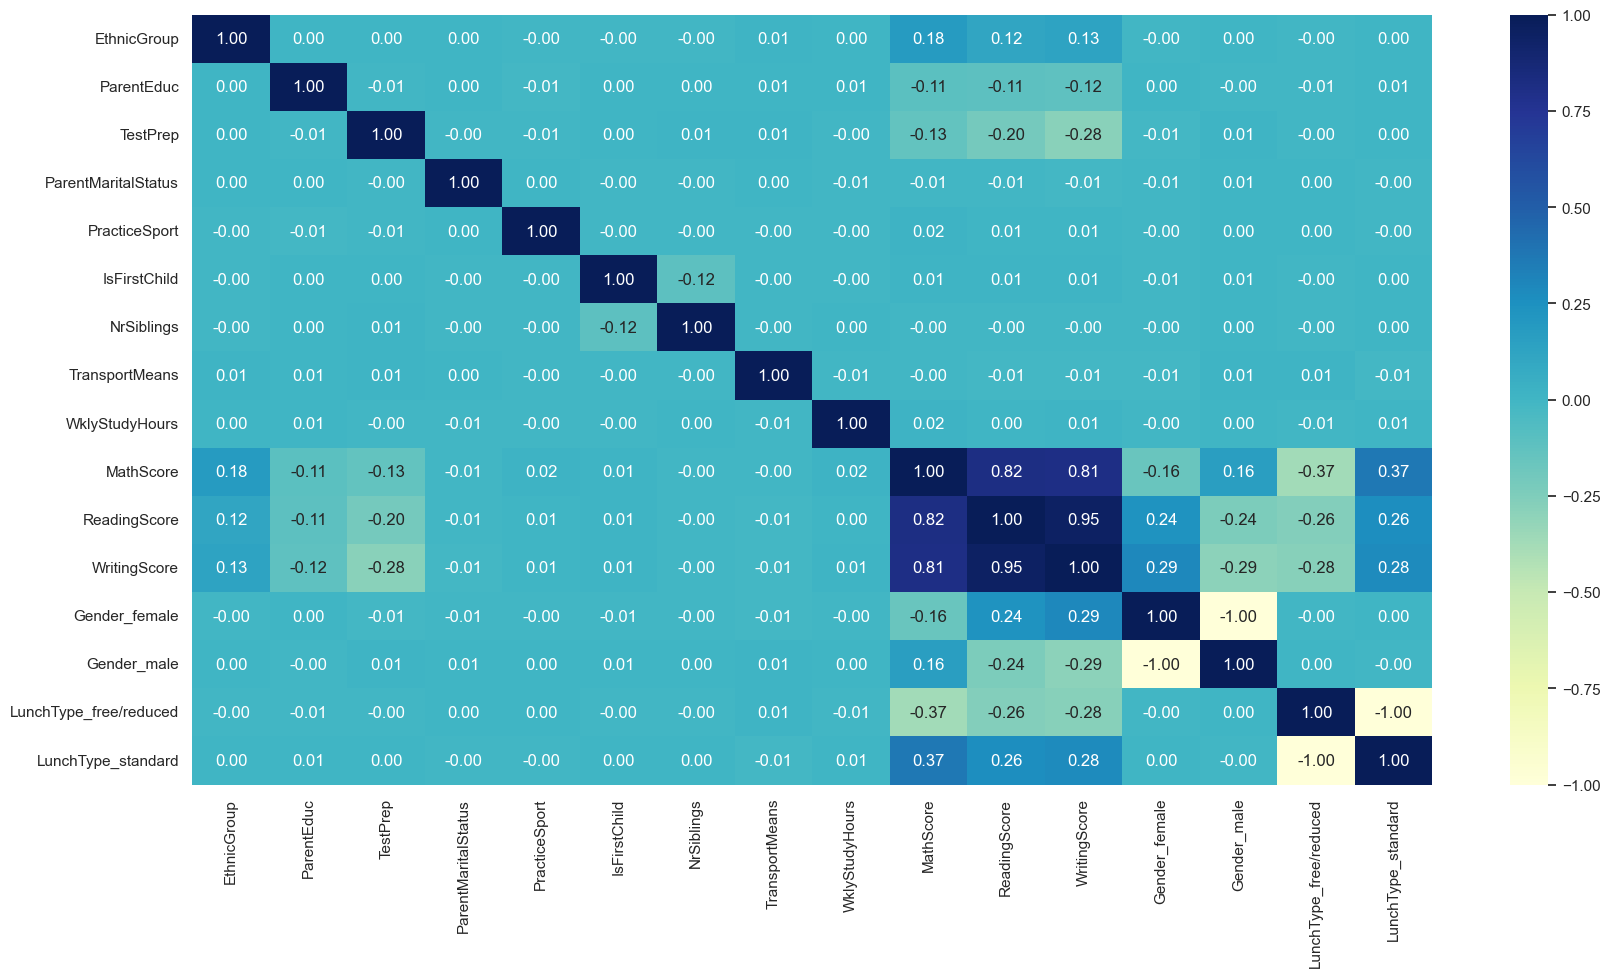

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(x.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()
#Heatmap is drawn with the necessary components

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

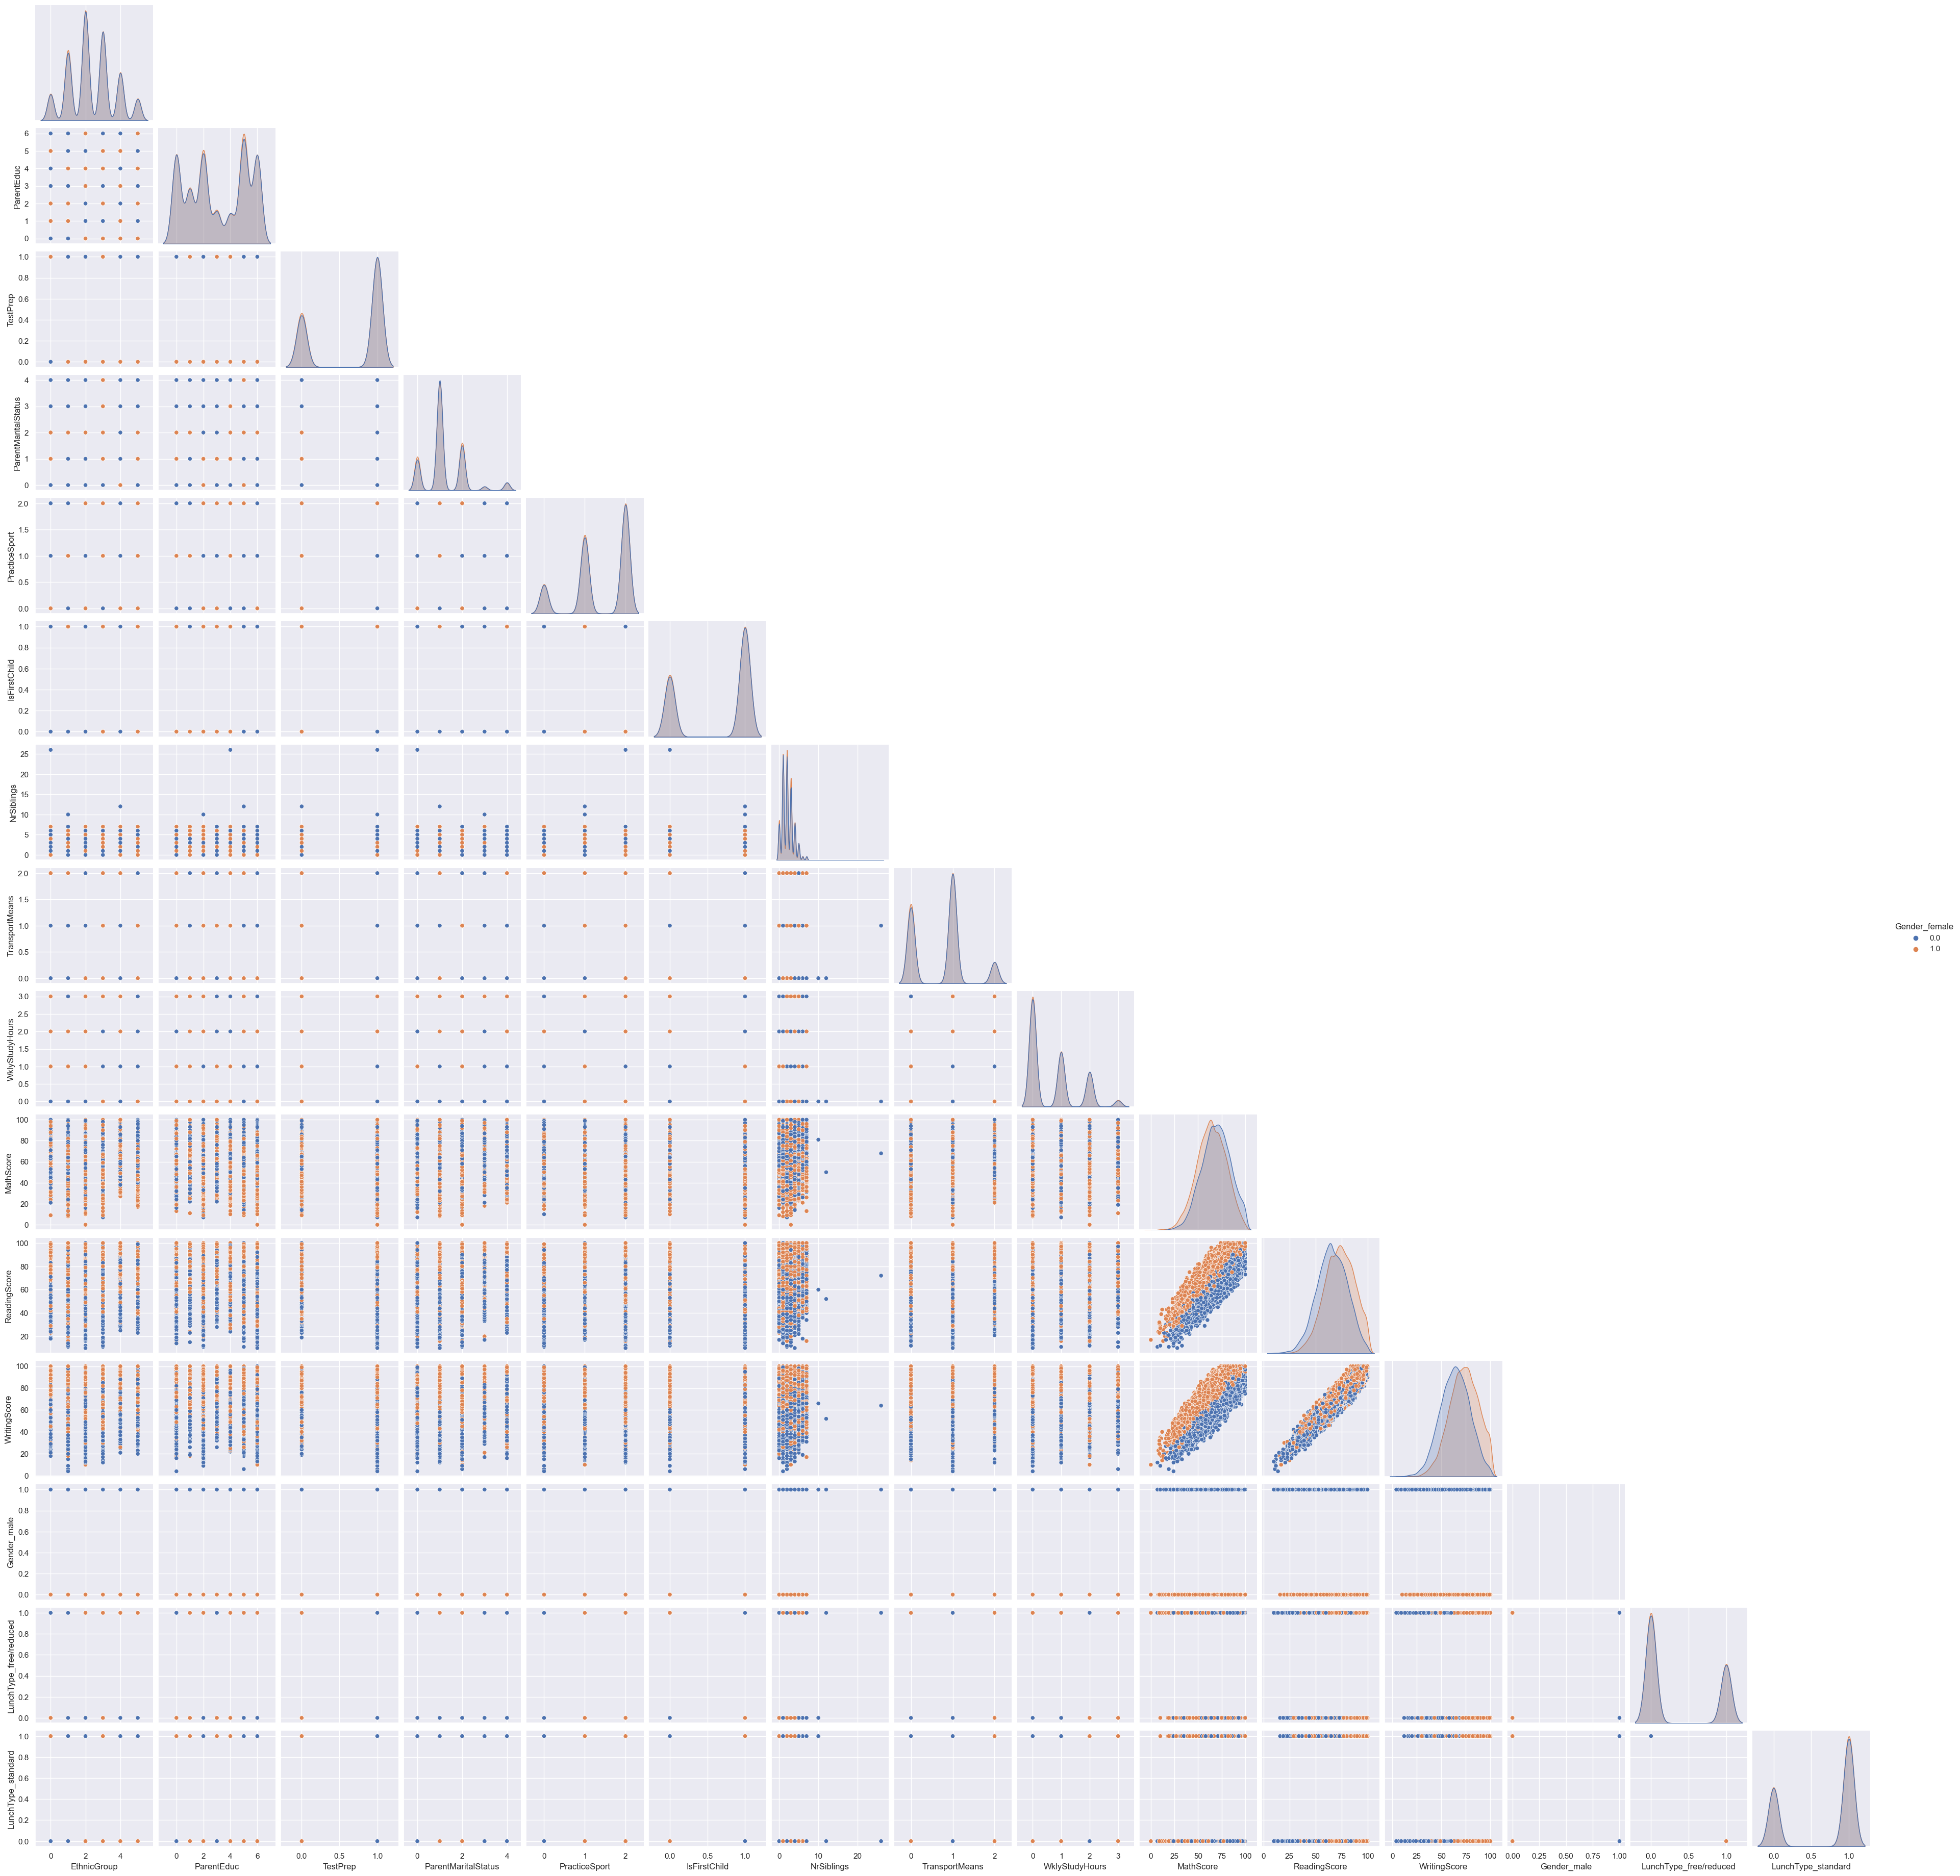

In [9]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(x.loc[:,['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore', 'Gender_female', 'Gender_male', 'LunchType_free/reduced', 'LunchType_standard']], hue="Gender_female", corner=True)
plt.show()
#Scatterplot matrix is drawn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
x = pd.read_csv("students_cleaned.csv")
x.head()
#cleaned dataset is loaded and checked

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [3]:
x['MathScore'].mean()


66.55994779681973

In [4]:
x['MathScore'].median()

67.0

In [5]:
x['MathScore'].mode()


0    64
Name: MathScore, dtype: int64

In [6]:
x['ReadingScore'].mean()

69.39008139574818

In [7]:
x['ReadingScore'].median()

70.0

In [8]:
x['ReadingScore'].mode()

0    65
Name: ReadingScore, dtype: int64

In [9]:
x['WritingScore'].mean()

68.42933681354535

In [10]:
x['WritingScore'].median()

69.0

In [11]:
x['WritingScore'].mode()

0    67
Name: WritingScore, dtype: int64

In [12]:
x.groupby('Gender_female').describe().transpose()

Gender_female                      0.0           1.0
EthnicGroup        count  14446.000000  14671.000000
                   mean       2.357192      2.347352
                   std        1.288791      1.292469
                   min        0.000000      0.000000
                   25%        1.000000      1.000000
...                                ...           ...
LunchType_standard min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        1.000000      1.000000
                   75%        1.000000      1.000000
                   max        1.000000      1.000000

[120 rows x 2 columns]

In [13]:
x['MathScore'].std() / x.MathScore.mean() * 100
#coeff of variation for MathScore

23.053282736702542

In [14]:
x['ReadingScore'].std() / x.ReadingScore.mean() * 100
#coeff of variation for ReadingScore

21.271325834740303

In [15]:
x['WritingScore'].std() / x.WritingScore.mean() * 100
#coeff of variation for WritingScore

22.574844991058495

3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [16]:
from scipy.stats import f_oneway
math_scores_male = x[x['Gender_female'] == 0]['MathScore']
math_scores_female = x[x['Gender_female'] == 1]['MathScore']
f_statistic, p_value = stats.f_oneway(math_scores_male, math_scores_female)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 767.7573293090003
P-value: 8.096041728771656e-167


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [17]:
math_scores_male = x[x['Gender_female'] == 0]['MathScore']
math_scores_female = x[x['Gender_female'] == 1]['MathScore']

t_statistic, p_value = stats.ttest_ind(math_scores_male, math_scores_female)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 27.70843426303627
P-value: 8.09604172877808e-167


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [18]:
from scipy.stats import mannwhitneyu
math_scores_male = x[x['Gender_female'] == 0]['MathScore']
math_scores_female = x[x['Gender_female'] == 1]['MathScore']
stat, p = mannwhitneyu(math_scores_male, math_scores_female)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=124916014.000, p=0.000
Probably different distributions


In [19]:
from scipy.stats import mannwhitneyu
ReadingScore_male = x[x['Gender_female'] == 0]['ReadingScore']
ReadingScore_female = x[x['Gender_female'] == 1]['ReadingScore']
stat, p = mannwhitneyu(ReadingScore_male, ReadingScore_female)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=77140845.000, p=0.000
Probably different distributions


In [20]:
from scipy.stats import mannwhitneyu
WritingScore_male = x[x['Gender_female'] == 0]['WritingScore']
WritingScore_female = x[x['Gender_female'] == 1]['WritingScore']
stat, p = mannwhitneyu(WritingScore_male, WritingScore_female)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=70749458.000, p=0.000
Probably different distributions


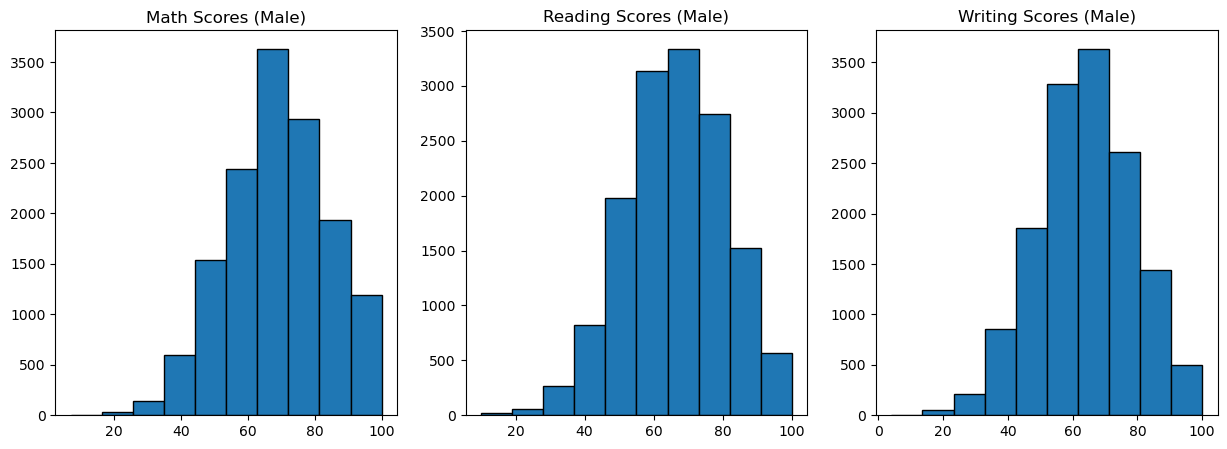

In [25]:
male_data = x[x['Gender_male'] == 1]
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(male_data['MathScore'], bins=10, edgecolor='black')
plt.title('Math Scores (Male)')


plt.subplot(1, 3, 2)
plt.hist(male_data['ReadingScore'], bins=10, edgecolor='black')
plt.title('Reading Scores (Male)')


plt.subplot(1, 3, 3)
plt.hist(male_data['WritingScore'], bins=10, edgecolor='black')
plt.title('Writing Scores (Male)')


plt.show()
#distribution for all the scores for males

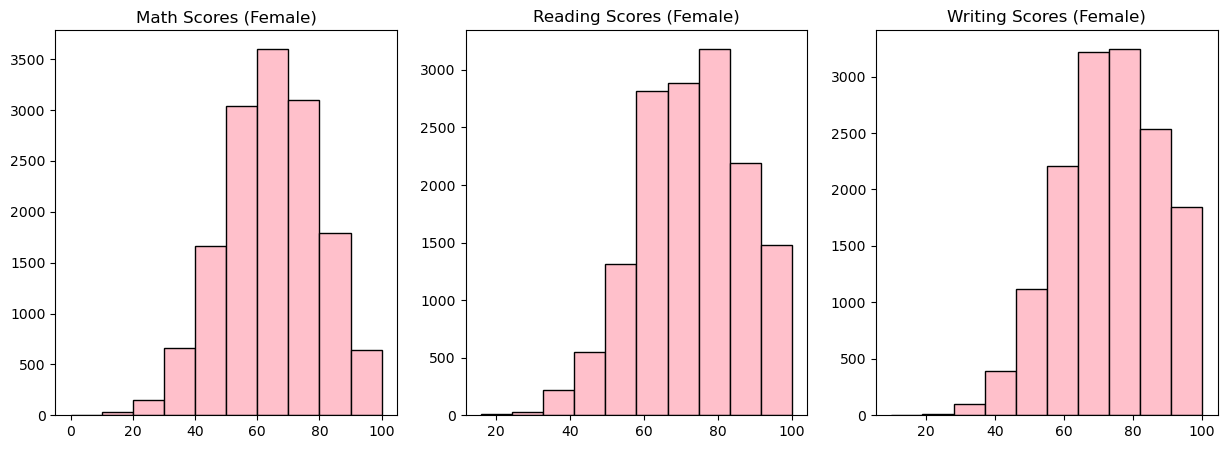

In [28]:
female_data = x[x['Gender_female'] == 1]
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(female_data['MathScore'], bins=10, edgecolor='black', color = 'pink')
plt.title('Math Scores (Female)')


plt.subplot(1, 3, 2)
plt.hist(female_data['ReadingScore'], bins=10, edgecolor='black', color = 'pink')
plt.title('Reading Scores (Female)')


plt.subplot(1, 3, 3)
plt.hist(female_data['WritingScore'], bins=10, edgecolor='black', color = 'pink')
plt.title('Writing Scores (Female)')


plt.show()
#distribution for all the scores for females

# Laboratory exercise 4

In this laboratory exercise you will use the questionnaire and answers given below

In [4]:
import pandas as pd

In [5]:
questionnaire = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                              'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                              'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

1. Write a function to detrmine the realiability of the questionnaire answers with Cronbach's Alpha.

In [16]:
def cronbach(questionnaire):
    n = questionnaire.shape[1]
    item_correlations = questionnaire.corr()
    mean_corr = item_correlations.mean().mean()
    cronbach_alpha = (n * mean_corr) / (1 + (n - 1) * mean_corr)
    return cronbach_alpha

print(cronbach(questionnaire))
#function for calculating the reability (Cronbach's Alpha)

0.8692079791566492


2. Explain the differences between in-house data labeling, crowdsourcing and outsourcing. 

In house data labeling: guarantees highest quality, is usually done by scientists or people in the organization, often requires consultations with experts in the field for correct data labeling, however can be a slow process.

Crowdsourcing: data labeling is done by a large number of freelancers who are registered on a crowdsourcing platform, data is mostly trivial and does not require additional expertise (eg.pictures of animals, plants)

Outsourcing: Middle-ground between crowdsourcing and in-house labeling, annotation is done by trained annotators, one of the advanteges in that annotators can be evaluated for a certain topic before they start annotating, overall is good for projects without lots of funding but that demand good quality data labeling. 

3. Explain the main differences between annotation for image classification, object detection and image segmentation.

Image classification: picture labeling, the number of unique labels in the whole database is equal to the number of classes that a model can classify. The classification can be divided into A- Binary classification that consists of only 2 labels, and B- Multiclass classification that consists of multiple labels. Classification with multiple labels is also possible (eg. with disease discovery).

Object detection: detection of objects and their location. Each object is marked with the smallest possible rectangle that surrounds it (bounding box). Usually each rectangle is paired with a label. The coordinates of the rectangle and its label are storred in a JSON file where the key of the dictionary is the number or ID of the image.

Image segmentation: the goal is to separate the objects in the image from its background and other objects. Usually the result is an image of the same size as the original image, that contains 1 where the object is present and 0 where it is not. If multiple objects are segmented within one image, each object is marked on a separate channel and the sum of all channels is the original/regerant image.

# Laboratory excercise 5

The notebook contains excercise connected to the auditory excerice 6. For any questions feel free to contact assistant: eda.jovicic@fer.hr

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# set seed for consistency
np.random.seed(2)

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [12]:
#load data
x = pd.read_csv("students_cleaned.csv")
x.nunique()

EthnicGroup                6
ParentEduc                 7
TestPrep                   2
ParentMaritalStatus        5
PracticeSport              3
IsFirstChild               2
NrSiblings                11
TransportMeans             3
WklyStudyHours             4
MathScore                 95
ReadingScore              90
WritingScore              93
Gender_female              2
Gender_male                2
LunchType_free/reduced     2
LunchType_standard         2
dtype: int64

2. Using linear regression, model the MathScore using features: TestPrep, NrSiblings, ParentMaritalStatus and ReadingScore. 

In [14]:
# Declares the model
mod = smf.ols(formula='MathScore ~ TestPrep + NrSiblings + C(ParentMaritalStatus) + ReadingScore', data=x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     8425.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:49:59   Log-Likelihood:            -1.0471e+05
No. Observations:               29117   AIC:                         2.094e+05
Df Residuals:                   29109   BIC:                         2.095e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.2296      0.314     19.864      0.000       5.615       6.844
C(ParentMaritalStatus)[T.1]     0.1670      0.146      1.140      0.254      -0.120       0.454
C(ParentMaritalStatus)[T.2]    -0.1318      0.168     -0.786      0.432      -0.460       0.197
C(ParentMaritalStatus)[T.3]     0.5432      0.396      1.373      0.170      -0.232       1.319
C(ParentMaritalStatus)[T.4]     0.2630      0.293      0.899      0.369      -0.311       0.837
TestPrep                        1.1064      0.113      9.809      0.000       0.885       1.327
NrSiblings                      0.0155      0.036      0.429      0.668      -0.055       0.086
ReadingScore                    0.8570      0.004    239.507      0.000       0.850       0.864
==============================================================================
Omnibus:                      233.691   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.729
Skew:                          -0.010   Prob(JB):                     1.53e-34
Kurtosis:                       2.642   Cond. No.                         575.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Questions:

a) Using the summary, write down the formula with coefficients

$MathScore = $

MathScore = 6.2296 + 0.1670*ParentMaritalStatus1 - 0.1318*ParentmaritalStatus2 + 0.5432*ParentMaritalStatus3 + 0.2630*ParentMaritalStatus4 + 1.1064*TestPrep + 0.0155*NrSiblings + 0.8570*ReadingScore

b) Are there any statisticaly important features?

Yes, the intercept, TestPrep and ReadingScore are statisticaly significant

c) Let's interpret the data, if students do test preparation, how does that affect the outcome on the math exam? 

If students do test preparation they will have better math scores, when testprep increases by 1 then mathscore increases by 1.1064

d) Are students who practice sport better at math exams or worse? Using linear regression, model the MathScore using only one feature: PracticeSport. Don't include intercept. Using summary, decide which students do the best at math exams - those who never practice sport, sometimes practice sport or those who do it regularly?

In [16]:
# Declare the model
mod = smf.ols(formula='MathScore ~ C(PracticeSport) - 1', data=x)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     87.35
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.51e-38
Time:                        10:02:41   Log-Likelihood:            -1.2074e+05
No. Observations:               29117   AIC:                         2.415e+05
Df Residuals:                   29114   BIC:                         2.415e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(PracticeSport)[0]    64.1576      0.244    262.426      0.000      63.678      64.637
C(PracticeSport)[1]    67.8441      0.150    452.998      0.000      67.551      68.138
C(PracticeSport)[2]    66.2896      0.126    526.520      0.000      66.043      66.536
==============================================================================
Omnibus:                      234.462   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.722
Skew:                          -0.171   Prob(JB):                     2.36e-47
Kurtosis:                       2.756   Cond. No.                         1.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Those who sometimes do sports have better math scores

# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
#solution
x = pd.read_csv("students_cleaned.csv")
x

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,4,2,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,5,2,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,3,0,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [3]:
#solution
def assign_grade(score):
    if 88 <= score <= 100:
        return 5
    elif 75 <= score <= 87:
        return 4
    elif 63 <= score <= 74:
        return 3
    elif 50 <= score <= 62:
        return 2
    else:
        return 1

x['MathScore'] = x['MathScore'].apply(assign_grade)

3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [4]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)
feature_cols = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'Gender_female', 'LunchType_free/reduced']
X = pd.get_dummies(x[feature_cols])
y = x.MathScore

In [5]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

Classification Report (Grades):
               precision    recall  f1-score   support

           1       0.52      0.07      0.12      1174
           2       0.35      0.41      0.38      2200
           3       0.33      0.59      0.42      2547
           4       0.36      0.25      0.30      2027
           5       0.00      0.00      0.00       788

    accuracy                           0.34      8736
   macro avg       0.31      0.26      0.24      8736
weighted avg       0.34      0.34      0.30      8736



C:\Users\jojom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jojom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jojom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


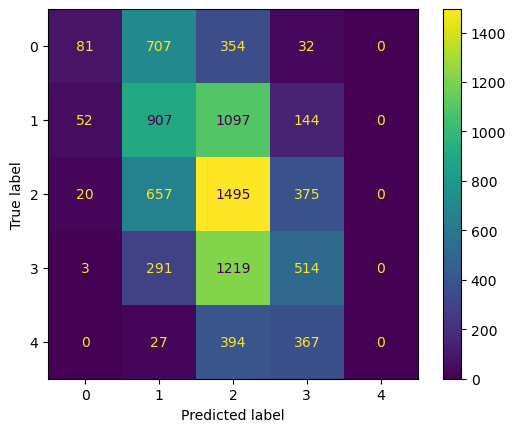

In [6]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

clf_grades = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf_grades.fit(X_train, y_train)
y_pred_grades = clf_grades.predict(X_test)

cm=confusion_matrix(y_test, y_pred_grades)
ConfusionMatrixDisplay(cm).plot()
print("Classification Report (Grades):\n", classification_report(y_test, y_pred_grades))


5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [10]:
#transform grades into failed (0) or passed (1)
x['MathScore_PassFail'] = x['MathScore'].apply(lambda score: 1 if score > 1 else 0)
X_passfail = pd.get_dummies(x[feature_cols])
y_passfail = x['MathScore_PassFail']
X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X_passfail, y_passfail, test_size=0.30, random_state=42)


Classification Report (Pass/Fail):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1174
           1       0.87      1.00      0.93      7562

    accuracy                           0.87      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.75      0.87      0.80      8736



C:\Users\jojom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jojom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jojom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


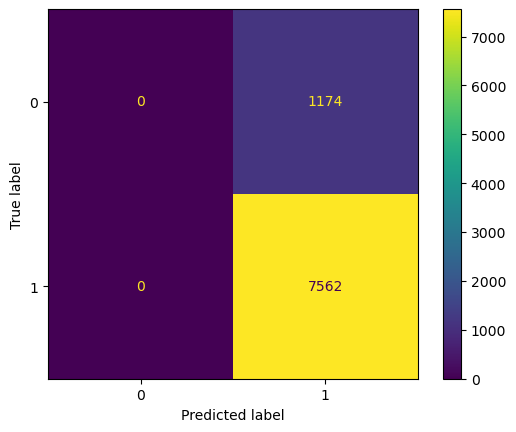

In [14]:
#Random Forest model
clf_passfail = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf_passfail.fit(X_train_pf, y_train_pf)
y_pred_passfail = clf_passfail.predict(X_test_pf)

cm_passfail = confusion_matrix(y_test_pf, y_pred_passfail)
ConfusionMatrixDisplay(cm_passfail).plot()
print("Classification Report (Pass/Fail):\n", classification_report(y_test_pf, y_pred_passfail))

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

The model worked better in the second model, we can tell this is the case from the precision, recall and F1 scores. 
One way to improve the model would be by increasing the number of predictors.